In [2]:
# First, let's load the provided dataset to understand its structure and content.
import pandas as pd

# Load the dataset
file_path = '../../DS2/Dataset/SurveyData/SurveyData_CSV_DAP_2021_HLES_health_conditions_v1.0.csv'
file_path_hles = '../../DS2/Dataset/SurveyData/SurveyData_CSV_DAP_2021_HLES_dog_owner_v1.0.csv'

dog_health_data = pd.read_csv(file_path, delimiter=',')  # Assuming tab-delimited format based on the file extension
dog_health = pd.read_csv(file_path, delimiter=',')
dog_hles = pd.read_csv(file_path_hles, delimiter=',')

dog_health_data.head()

/var/folders/fm/gppl2h2d0d10f3vj1qqnr3g00000gn/T/ipykernel_23538/1718267450.py:10: DtypeWarning: Columns (5,21,75,77,79,81,83,85,87,89,191,192,193,194,195,196,197,198,199,200,201,204,214,285,295,516,566) have mixed types. Specify dtype option on import or set low_memory=False.
  dog_hles = pd.read_csv(file_path_hles, delimiter=',')


,dog_id,hs_condition_type,hs_condition,hs_condition_other_description,hs_condition_is_congenital,hs_eye_condition_cause,hs_condition_cause_other_description,hs_neurological_condition_vestibular_disease_type,hs_diagnosis_year,hs_diagnosis_month,hs_required_surgery_or_hospitalization,hs_follow_up_ongoing
0,100001,3,304.0,NaN,False,NaN,NaN,NaN,2021.0,1.0,1.0,False
1,100001,3,305.0,NaN,False,NaN,NaN,NaN,2021.0,1.0,1.0,True
2,100001,3,306.0,NaN,False,NaN,NaN,NaN,2021.0,1.0,1.0,True
3,100004,16,1617.0,NaN,False,NaN,NaN,NaN,2018.0,9.0,4.0,False
4,100005,1,102.0,NaN,False,NaN,NaN,NaN,2021.0,2.0,4.0,False


In [5]:
# Count the number of rows with the same value in 'hs_condition'
value_counts = dog_health['hs_condition'].value_counts()

# Calculate the percentage for each condition
percentage_per_condition = value_counts / len(dog_health) * 100

# Display the results
main_condition_df = pd.DataFrame({

    'Count': value_counts,
    'Percentage': percentage_per_condition
})

# Keep the top 20 conditions
top_20_conditions = main_condition_df.head(20)

# Sum the counts and percentage of the remaining conditions
other_conditions = main_condition_df.iloc[20:].sum()

# Create a new row for 'Other' with the aggregated counts and percentage
other_row = pd.DataFrame({'Count': other_conditions['Count'], 'Percentage': other_conditions['Percentage']},
                         index=['Other'])

# Concatenate the top 20 conditions and the 'Other' row
combined_condition = pd.concat([top_20_conditions, other_row])

# Display the results
print(combined_condition)


          Count  Percentage
304.0    4906.0    5.275269
305.0    4499.0    4.837634
1801.0   3566.0    3.834409
1617.0   2379.0    2.558065
202.0    2348.0    2.524731
426.0    2236.0    2.404301
306.0    2153.0    2.315054
1113.0   2096.0    2.253763
1817.0   1743.0    1.874194
1898.0   1683.0    1.809677
504.0    1610.0    1.731183
1605.0   1556.0    1.673118
1701.0   1530.0    1.645161
423.0    1389.0    1.493548
102.0    1381.0    1.484946
1812.0   1179.0    1.267742
1105.0   1157.0    1.244086
428.0    1101.0    1.183871
307.0    1061.0    1.140860
412.0    1015.0    1.091398
Other   51862.0   55.765591


In [6]:
import pandas as pd

hs_condition_mapping = {
    304: 'Dental calculus (yellow build-upon teeth',
    305: 'Extracted teeth',
    1801:'Trauma',
    1617:'Giardia',
    202:'Ear Infection',
    426:'Seasonal allergies',
    306:'Fractured teeth',
    1113:'Osteoarthritis',
    1817:'Snakebite',
    1898:'Torn or broken toenail',
    504:'Murmur',
    1605:'Bordetella and/or parainfluenza("kennel cough")',
    1701:'Chocolate',
    423:'Pruritis (itchy skin)',
    102:'Cataracts',
    1812:'Kicked by horse or other large animal',
    1105:'Cruciate ligament rupture',
    428:'Sebaceous cysts',
    307:'Gingivitis (red, puffy gums)',
    412:'Food or medicine allergies that affect the skin',

}

# Convert the dictionary to a DataFrame
df_dog_health_condition_mapping = pd.DataFrame(list(hs_condition_mapping.items()), columns=['Code', 'Description'])

# Display the resulting DataFrame
print(df_dog_health_condition_mapping)

    Code                                      Description
0    304         Dental calculus (yellow build-upon teeth
1    305                                  Extracted teeth
2   1801                                           Trauma
3   1617                                          Giardia
4    202                                    Ear Infection
5    426                               Seasonal allergies
6    306                                  Fractured teeth
7   1113                                   Osteoarthritis
8   1817                                        Snakebite
9   1898                           Torn or broken toenail
10   504                                           Murmur
11  1605  Bordetella and/or parainfluenza("kennel cough")
12  1701                                        Chocolate
13   423                            Pruritis (itchy skin)
14   102                                        Cataracts
15  1812            Kicked by horse or other large animal
16  1105      

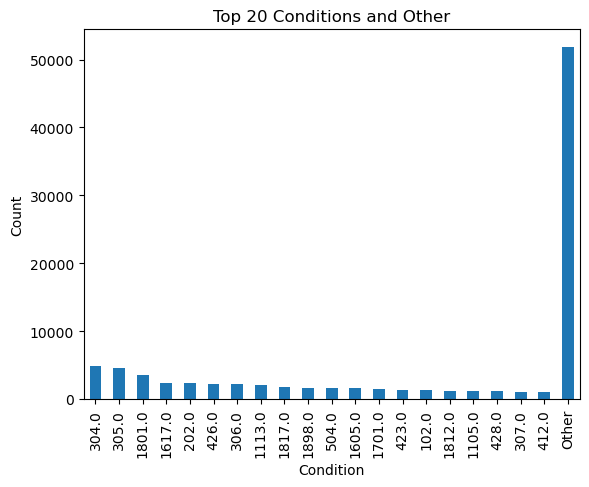

In [7]:
import matplotlib.pyplot as plt

# Plotting the bar chart
combined_condition.plot(kind='bar', y='Count', legend=False)
plt.title('Top 20 Conditions and Other')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

One Hot Encode

In [8]:
#encode

hs_condition_column = combined_condition.index.to_series().reset_index(drop=True)

one_hot_encoded_disease = pd.get_dummies(hs_condition_column)

print(one_hot_encoded_disease)


    102.0  202.0  304.0  305.0  306.0  307.0  412.0  423.0  426.0  428.0  ...  \
0   False  False   True  False  False  False  False  False  False  False  ...   
1   False  False  False   True  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False   True  False  False  False  False  False  False  False  False  ...   
5   False  False  False  False  False  False  False  False   True  False  ...   
6   False  False  False  False   True  False  False  False  False  False  ...   
7   False  False  False  False  False  False  False  False  False  False  ...   
8   False  False  False  False  False  False  False  False  False  False  ...   
9   False  False  False  False  False  False  False  False  False  False  ...   
10  False  False  False  False  False  False  False  False  False  False  ...   
11  False  False  False  Fal

Extracted Data

In [9]:
import pandas as pd

dog_health = pd.read_csv(file_path, delimiter=',')

specific_values = [102.0,202.0,304.0,305.0  , 306.0  , 307.0  , 412.0  , 423.0  , 426.0,
                   428.0  , 504.0  , 1105.0 , 1113.0 , 1605.0 , 1617.0 , 1701.0  ,1801.0 , 1812.0,1817.0 ,1898.0]  

# 选择包含这些特定值的行
filtered_data = dog_health[dog_health['hs_condition'].isin(specific_values)]

# 选择'hs_condition'和'dog_id'列
result = filtered_data[['dog_id', 'hs_condition']]

result.to_csv('disease_features_input.csv', index=False)


In [7]:
import pandas as pd

#load dataset
dog_health = pd.read_csv(file_path, delimiter=',')

# store the unique dog ids in a variable
unique_dog_ids = dog_health['dog_id'].unique()
aggregated_features = pd.DataFrame(index=unique_dog_ids)

specific_values = [102.0, 202.0, 304.0, 305.0, 306.0, 307.0, 412.0, 423.0, 426.0,
                   428.0, 504.0, 1105.0, 1113.0, 1605.0, 1617.0, 1701.0, 1801.0, 1812.0,1817.0 ,1898.0]

# one-hot encode the hs_condition column
for condition in specific_values:
    condition_df = dog_health[dog_health['hs_condition'] == condition]
    condition_present = condition_df.groupby('dog_id').size() > 0
    aggregated_features[f'{condition}'] = condition_present.reindex(aggregated_features.index, fill_value=False)

specific_values_str = [str(x) for x in specific_values]
aggregated_features['Other'] = ~aggregated_features[specific_values_str].any(axis=1)

aggregated_features.reset_index(inplace=True)
aggregated_features.rename(columns={'index': 'dog_id'}, inplace=True)

# save the results to CSV
aggregated_features.to_csv('one_hot_encoded_disease_input.csv', index=False)


This one consider all the dog_id

In [8]:
# 假设 dog_hles 是另一个包含 dog_id 的大数据集
dog_hles = pd.read_csv(file_path_hles, delimiter=',')

# 从 dog_hles 获取独特的 dog_id
unique_dog_ids_hles = dog_hles['dog_id'].unique()

# 找出不在 aggregated_features 中的 dog_id
new_dog_ids = set(unique_dog_ids_hles) - set(aggregated_features['dog_id'])

new_dog_ids_list = list(new_dog_ids)

# 为新的 dog_id 创建包含 False 的 DataFrame，除了 'Other' 列
new_dogs_df = pd.DataFrame(False, index=new_dog_ids_list, columns=aggregated_features.columns[1:])
new_dogs_df['Other'] = True  # 将 'Other' 列设为 True

new_dogs_df.reset_index(inplace=True)
new_dogs_df.rename(columns={'index': 'dog_id'}, inplace=True)

# 合并新的 DataFrame 到 aggregated_features
final_df = pd.concat([aggregated_features, new_dogs_df], ignore_index=True)

# 保存合并后的结果
final_df.to_csv('one_hot_encoded_disease_input.csv', index=False)



/var/folders/fm/gppl2h2d0d10f3vj1qqnr3g00000gn/T/ipykernel_23538/1257527966.py:2: DtypeWarning: Columns (5,21,75,77,79,81,83,85,87,89,191,192,193,194,195,196,197,198,199,200,201,204,214,285,295,516,566) have mixed types. Specify dtype option on import or set low_memory=False.
  dog_hles = pd.read_csv(file_path_hles, delimiter=',')
